# Demo: Uso de modelos de inteligencia artificial en Python con la librería transformers (Hugging Face)

En esta demo aprenderemos cómo usar modelos de inteligencia artificial en Python utilizando la librería transformers de Hugging Face.

- La librería transformers de Hugging Face es una librería de Python que proporciona una API fácil de usar para utilizar modelos de inteligencia artificial de última generación.
- Entre las tareas que se pueden realizar con transformers se encuentran la clasificación de texto, la generación de texto, la traducción de texto, la extracción de información, generación de imágenes, entre otras.

## 1. Librerías o dependencias de Python necesarias
Para poder ejecutar este notebook necesitarás tener instaladas las siguientes librerías de Python:

- Transformers: `transformers`
- Pytorch: `torch torchvision torchaudio`
- *Jupyter Notebook (Optional): `ipykernel ipywidgets`

Puedes instalarlas ejecutando el siguiente comando en tu terminal:
```bash
pip install jupyter ipykernel ipywidgets transformers torch torchvision torchaudio
```

*Más información en:*
- *Transformers*: https://huggingface.co/docs/transformers/en/installation
- *Pytorch*: https://pytorch.org/get-started/locally/

In [1]:
#!pip install jupyter ipykernel ipywidgets transformers torch torchvision torchaudio

### 1.1. Otras dependencias usadas en esta sesion
Aparte de las librerías mencionadas anteriormente, también usaremos otras librerías que aportarán funcionalidades adicionales. Estas librerías son:

```bash
pip install gradio phonemizer timm matplotlib
```

In [2]:
import os
import gc
from IPython.display import Audio as IPythonAudio

import torch
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr

## 2. Jupyter Notebooks

- Jupyter Notebook es una aplicación web de código abierto que te permite crear y compartir documentos que contienen código en vivo, ecuaciones, visualizaciones y texto explicativo
- Los usos incluyen: limpieza y transformación de datos, simulación numérica, estadísticas, aprendizaje automático y mucho más.
  
Para instalar Jupyter Notebook, ejecuta:

```bash
pip install jupyter
```

Para ejecutar Jupyter Notebook, ejecuta:

```bash
jupyter notebook
```

También puede utilizarse a través de la extensión de Jupyter en Visual Studio Code (recomendado) disponible en su marketplace de extensiones.

## 3. Modelos de inteligencia artificial

Los modelos de inteligencia artificial son modelos que han sido entrenados para realizar tareas específicas, como clasificación de texto/audio/imagenes, generación de texto/audio/imagenes, etc.


## 4. Huggingface

Hugging Face es una empresa que ha desarrollado una plataforma de inteligencia artificial y una librería de código abierto para modelos de inteligencia artificial llamada **transformers**.

La librería transformers de Hugging Face proporciona una API fácil de usar para usar modelos de inteligencia artificial de última generación.


In [3]:

# from transformers.utils import logging
# logging.set_verbosity_error()

In [4]:
# !huggingface-cli logout

## 5. Uso de la GPU

El uso de la GPU es opcional, pero se recomienda para acelerar el procesamiento de los modelos.
- La libreria torch (Pytorch) permite usar la GPU para acelerar el procesamiento de los modelos.
- Para usar la GPU, asegúrate de tener instalado los drivers de la GPU y la versión de CUDA compatible con la versión de Pytorch que estás usando.
- Puedes verificar si tienes una GPU disponible con el comando `!nvidia-smi` o `torch.cuda.is_available()`.
- Puedes especificar el dispositivo de la GPU con el parámetro `device=0` o `device=1` o simplemente con `device='cuda'`.
- Usa una precisión de 16 puntos flotantes (FP16) para acelerar el procesamiento de los modelos (si es posible) con el parámetro `torch_dtype=torch.float16` https://huggingface.co/docs/transformers/en/main_classes/pipelines

In [5]:
torch.cuda.is_available()

True

In [6]:
if torch.cuda.is_available():
    torch.cuda.current_device()

In [7]:
if torch.cuda.is_available():
    torch.cuda.get_device_name(0)

In [8]:
!nvidia-smi

Wed Dec 11 15:35:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti     On  |   00000000:01:00.0 Off |                  N/A |
| N/A   59C    P0             14W /   50W |       3MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
device

device(type='cuda')

## 6. Uso simple de modelos de inteligencia artificial en Huggingface: Pipeline

- La forma más sencilla de usar un modelo de inteligencia artificial en Huggingface es a través de un `pipeline`.
- Un `pipeline` es una clase que admite como parámetro de entrada un modelo pre-entrenado y proporciona una API fácil de usar para realizar tareas específicas.
- Algunas tareas que pueden realizarse son: `translation`, `text-generation`, `summarization`, `question-answering`,  `speech-recognition`, `speech-to-text`, etc.

### 6.1. Importar y usar la clase `pipeline` de la librearía `transformers`

- Elige una tarea específica a realizar con un modelo de inteligencia artificial: translation, text-generation, summarization, question-answering, speech-recognition, speech-to-text, ... (https://huggingface.co/transformers/task_summary.html)
- Elige un modelo pre-entrenado que pueda realizar esa tarea específica: https://huggingface.co/models
  - Ten en cuenta la fecha de publicación, tamaño, precisión, etc.
- *Opcional: elige un dispositivo GPU para acelerar el procesamiento del modelo.
- *Opcional: elige una precisión de 16 puntos flotantes (FP16) para acelerar el procesamiento del modelo.

Ejemplo: `"text2text-generation"` pipeline (chat bot):

In [11]:
from transformers import pipeline

pipe = pipeline(task="text2text-generation",  # tarea a realizar
                model="facebook/blenderbot-400M-distill",  # modelo a utilizar
                device=device,  # dispositivo a utilizar
                torch_dtype=torch.bfloat16)  # precisión de los cálculos

Device set to use cuda


### 6.2. Usar un pipeline

In [12]:
user_message ="Is the Earth flat or round?"
pipe(user_message)

[{'generated_text': ' It is round.  It is the center of the Solar System.  I have never seen it before.'}]

In [13]:
pipe = None

###  6.3. Tareas

Algunas de las tareas que se pueden realizar importando modelos pre-entrenados de Huggingface son:

NLP o Natural Language Processing:
- Text classification
- Question answering
- Summarization
- Translation
- Language modeling
- etc.

Audio
- Speech recognition
- etc.

Computer Vision
- Image classification
- Object detection
- etc.

Más información en : [Task summary](https://huggingface.co/docs/transformers/task_summary)

### 6.4. NLP

#### 6.4.1. Translation

- Traducción de texto de un idioma a otro.

*Acrónimos de lenguas para utilizar en el modelo: https://huggingface.co/facebook/nllb-200-distilled-600M/blob/main/README.md*

In [14]:
pipe = pipeline("translation",
                model="facebook/nllb-200-distilled-600M",
                device=device,
                torch_dtype=torch.bfloat16,
                src_lang="spa_Latn", # idioma de origen
                tgt_lang="fra_Latn") # idioma de destino

text = "El golpe de la langosta mantis causa sonoluminiscencia a partir del colapso de la burbuja. Esto produce durante un intervalo tremendamente corto una cantidad muy pequeña de luz y una temperatura de miles de grados dentro de la burbuja que colapsa. "
response = pipe(text)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Device set to use cuda


In [15]:
print(response[0]['translation_text'])

Le choc du langost mantis provoque une sonoluminisation à partir de l'effondrement de la bulle, ce qui produit pendant un intervalle extrêmement court une très petite quantité de lumière et une température de milliers de degrés à l'intérieur de la bulle qui s'effondre. 


In [16]:
pipe = pipeline("translation",
                model="facebook/nllb-200-distilled-600M",
                device=device,
                torch_dtype=torch.bfloat16,
                src_lang="spa_Latn",
                tgt_lang="eng_Latn")

response = pipe(text)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Device set to use cuda


In [17]:
print(response[0]['translation_text'])

The mantis lobster's impact causes sonoluminescence from the bubble collapse, which produces during a tremendously short interval a very small amount of light and a temperature of thousands of degrees inside the bubble that collapses.


In [18]:
pipe = None
gc.collect() 

93

#### 6.4.2. Summarization

- Resumen de texto.

In [19]:
summarizer = pipeline(task="summarization",
                      model="facebook/bart-large-cnn",
                      device=device,
                      torch_dtype=torch.bfloat16,)

Device set to use cuda


In [20]:
text = """Paris is the capital and most populous city of France, with
          an estimated population of 2,175,601 residents as of 2018,
          in an area of more than 105 square kilometres (41 square
          miles). The City of Paris is the centre and seat of
          government of the region and province of Île-de-France, or
          Paris Region, which has an estimated population of
          12,174,880, or about 18 percent of the population of France
          as of 2017."""
          
summary = summarizer(text,
                     min_length=10,
                     max_length=100,)

In [21]:
summary[0]['summary_text']

'Paris is the capital and most populous city of France, with an estimated population of 2,175,601 residents as of 2018. The City of Paris is the centre and seat of the government of the region and province of Île-de-France.'

In [22]:
summarizer = None
gc.collect() 

0

### 6.5. Audio

Huggingface dispone de modelos pre-entrenados para tareas de audio:
- Automatic Speech Recognition (ASR)
- Speech-to-Text (STT)
- Text-to-Speech (TTS)
- etc.

#### 6.5.1. Audio Classification

- Etiqueta datos en formato audio con unas clases predefinidas.

In [23]:
classifier = pipeline(task="audio-classification",
                      model="superb/hubert-base-superb-er",
                      device=device,)
preds = classifier("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Device set to use cuda


In [24]:
preds

[{'score': 0.4532, 'label': 'hap'},
 {'score': 0.3622, 'label': 'sad'},
 {'score': 0.0943, 'label': 'neu'},
 {'score': 0.0903, 'label': 'ang'}]

In [25]:
classifier = None
gc.collect() 

132

#### 6.5.2. Automatic Speech Recognition (ASR)

- Reconocimiento automático de voz.

In [26]:
transcriber = pipeline(task="automatic-speech-recognition",
                       model="openai/whisper-small",
                       device=device,
                       torch_dtype=torch.bfloat16,)
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

Device set to use cuda
/home/sergio.sampayo/.cache/pypoetry/virtualenvs/workshop-python-entornos-profesionales-VgxNFXIN-py3.11/lib/python3.11/site-packages/transformers/models/whisper/generation_whisper.py:512: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}

In [27]:
transcriber("https://www.myinstants.com/media/sounds/el-alcalde.mp3")

/home/sergio.sampayo/.cache/pypoetry/virtualenvs/workshop-python-entornos-profesionales-VgxNFXIN-py3.11/lib/python3.11/site-packages/transformers/models/whisper/generation_whisper.py:512: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


{'text': ' Es el vecino el que elige al alcalde y es el alcalde el que quiere que sean los vecinos el alcalde.'}

In [28]:
demo = gr.Blocks()

def transcribe_speech(filepath: str) -> str:
    if filepath is None:
        gr.Warning("No audio found, please retry.")
        return ""
    output = transcriber(filepath)
    return output["text"]

file_transcribe = gr.Interface(
    fn=transcribe_speech,
    inputs=gr.Audio(sources="upload",
                    type="filepath"),
    outputs=gr.Textbox(label="Transcription",
                       lines=3),
    flagging_mode="never")

mic_transcribe = gr.Interface(
    fn=transcribe_speech,
    inputs=gr.Audio(sources="microphone",
                    type="filepath"),
    outputs=gr.Textbox(label="Transcription",
                       lines=3),
    flagging_mode="never")

In [29]:
with demo:
    gr.TabbedInterface(
        [file_transcribe,
         mic_transcribe],
         ["Transcribe Audio File",
          "Transcribe Microphone Audio"],
    )

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://1762aa31239039eef7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [30]:
demo.close()

Closing server running on port: 7860


In [31]:
transcriber = None
gc.collect() 

40626

#### 6.5.3. Text to speech

Convierte texto en audio.

In [32]:
narrator = pipeline(task="text-to-speech",
                    model="kakao-enterprise/vits-ljs",
                    device=device,)

text = """
It began with the forging of the Great Rings. \
Three were given to the Elves, immortal, wisest and fairest of all beings. \
Seven to the Dwarf-Lords, great miners and craftsmen of the mountain halls. \
And nine, nine rings were gifted to the race of Men, who above all else desire power.
"""

narrated_text = narrator(text)

Device set to use cuda


In [33]:
narrated_text

{'audio': array([[-0.00112211, -0.00117224, -0.00149447, ...,  0.00113056,
          0.0015505 ,  0.00150412]], shape=(1, 410368), dtype=float32),
 'sampling_rate': 22050}

In [34]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

In [35]:
narrator = None
gc.collect() 

6238

### 6.6. Computer Vision

Huggingface también proporciona modelos pre-entrenados para tareas de visión por computadora:
- Image classification
- Object detection
- etc.

#### 6.6.1. Object Detection

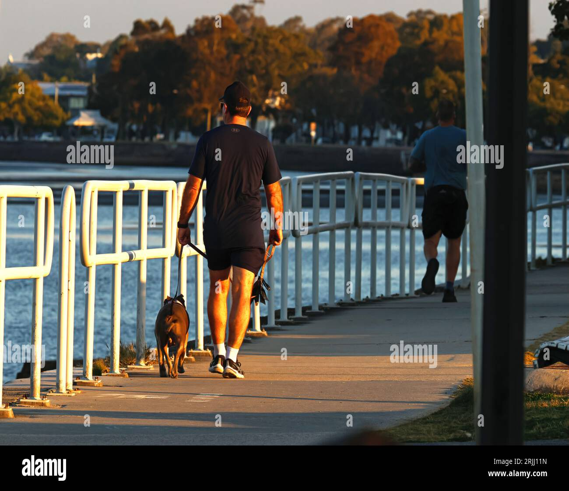

In [36]:
from PIL import Image
import requests
import io
from io import BytesIO

url = 'https://c8.alamy.com/comp/2RJJ11N/random-man-guy-people-walking-a-dog-man-running-away-from-the-camera-no-faces-sports-healthy-living-2RJJ11N.jpg'
response = requests.get(url)
raw_image = Image.open(BytesIO(response.content))
raw_image.resize((569, 491))

In [37]:
def render_results_in_image(in_pil_img, in_results):
    plt.figure(figsize=(16, 10))
    plt.imshow(in_pil_img)

    ax = plt.gca()

    for prediction in in_results:

        x, y = prediction['box']['xmin'], prediction['box']['ymin']
        w = prediction['box']['xmax'] - prediction['box']['xmin']
        h = prediction['box']['ymax'] - prediction['box']['ymin']

        ax.add_patch(plt.Rectangle((x, y),
                                   w,
                                   h,
                                   fill=False,
                                   color="green",
                                   linewidth=2))
        ax.text(
           x,
           y,
           f"{prediction['label']}: {round(prediction['score']*100, 1)}%",
           color='red'
        )

    plt.axis("off")

    # Save the modified image to a BytesIO object
    img_buf = io.BytesIO()
    plt.savefig(img_buf, format='png',
                bbox_inches='tight',
                pad_inches=0)
    img_buf.seek(0)
    modified_image = Image.open(img_buf)

    # Close the plot to prevent it from being displayed
    plt.close()

    return modified_image

In [38]:

od_pipe = pipeline(task="object-detection",
                   model="facebook/detr-resnet-50",
                   device=device)
pipeline_output = od_pipe(raw_image)
processed_image = render_results_in_image(
    raw_image, 
    pipeline_output)

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


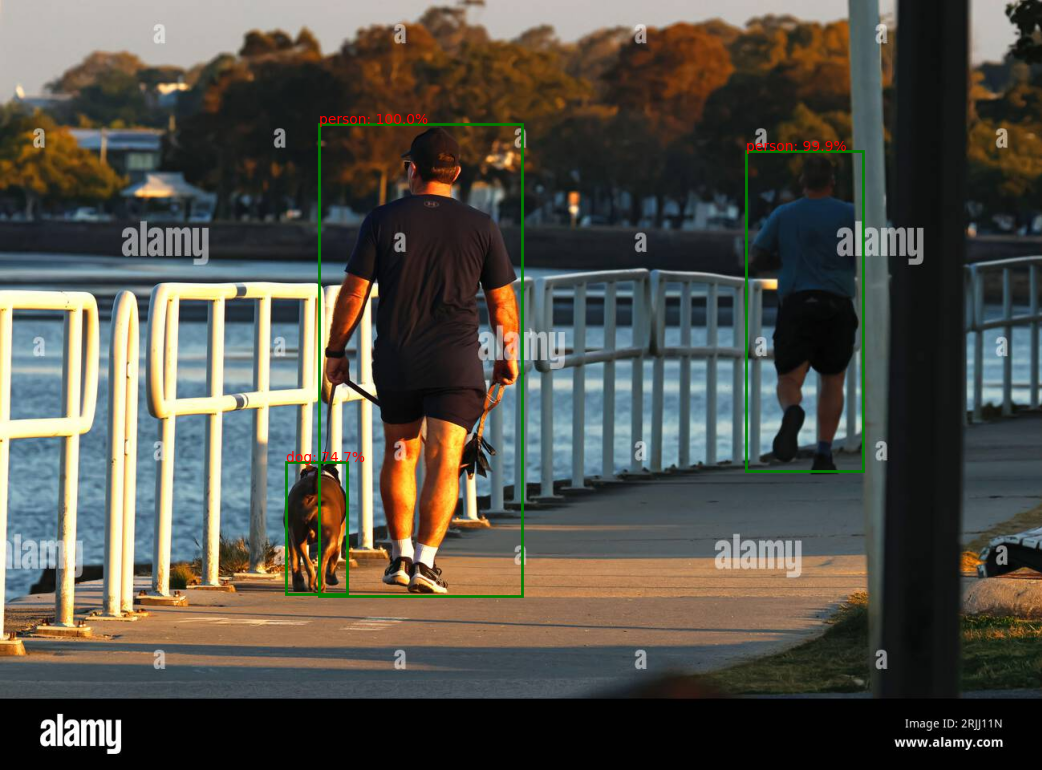

In [39]:
processed_image

In [40]:
def get_pipeline_prediction(pil_image):
    
    pipeline_output = od_pipe(pil_image)
    
    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [41]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image", 
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://812cda1c84f4fc4fe2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [42]:
demo.close()

Closing server running on port: 7860


In [43]:
od_pipe = None
gc.collect() 

18453

#### 6.6.2. Image Segmentation

In [44]:
torch.cuda.empty_cache()
gc.collect()

236

In [45]:
segmentation_pipe = pipeline(task="mask-generation",
                             model="Zigeng/SlimSAM-uniform-77",
                             device=device)

output = segmentation_pipe(raw_image, points_per_batch=32)

Device set to use cuda


In [46]:
output

{'masks': [array([[ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]], shape=(960, 1300)),
  array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ..., False, False, False],
         [False, False, False, ..., False, False, False]], shape=(960, 1300)),
  array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., F

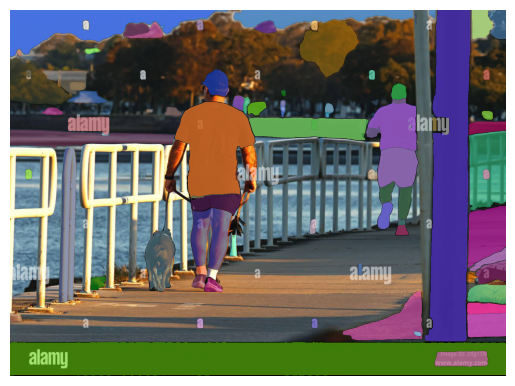

In [47]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3),
                                np.array([0.6])],
                               axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_pipe_masks_on_image(raw_image, outputs):
    plt.imshow(np.array(raw_image))
    ax = plt.gca()
    for mask in outputs["masks"]:
        show_mask(mask, ax=ax, random_color=True)
    plt.axis("off")
    plt.show()
    
show_pipe_masks_on_image(raw_image, output)

In [48]:
segmentation_pipe = None
gc.collect()

7855

## 7. Ejemplos de uso de modelos de inteligencia artificial en Huggingface (sin la clase pipeline)

#### 7.1. Image Retrieval (multimodal models: image-text matching)

- Multimodal models son modelos que pueden procesar tanto texto como imágenes, videos, audio, etc.
- Tareas para modelos multimodales:
    - Image-text matching
    - Image captioning
    - Visual question answering
    - etc.


*Mas informacion en: https://huggingface.co/learn/computer-vision-course/en/unit4/multimodal-models/a_multimodal_world*

In [ ]:
# Más información de Blip: https://huggingface.co/docs/transformers/en/model_doc/blip


from transformers import BlipForImageTextRetrieval
from transformers import AutoProcessor

model = BlipForImageTextRetrieval.from_pretrained(
    pretrained_model_name_or_path="Salesforce/blip-itm-base-coco")

processor = AutoProcessor.from_pretrained(
    pretrained_model_name_or_path="Salesforce/blip-itm-base-coco")

In [50]:
text = "an image of a man walking a dog on a bridge"

inputs = processor(images=raw_image,
                   text=text,
                   return_tensors="pt")

itm_scores = model(**inputs)[0]
itm_score = torch.nn.functional.softmax(
    itm_scores,dim=1)

print(f"""\
The image and text are matched \
with a probability of {itm_score[0][1]:.4f}""")

The image and text are matched with a probability of 0.7756


In [51]:
text = "an image of a woman running in the city"

inputs = processor(images=raw_image,
                   text=text,
                   return_tensors="pt")

itm_scores = model(**inputs)[0]
itm_score = torch.nn.functional.softmax(
    itm_scores,dim=1)

print(f"""\
The image and text are matched \
with a probability of {itm_score[0][1]:.4f}""")

The image and text are matched with a probability of 0.0001


In [52]:
model = None
processor = None
gc.collect()

0

#### 7.2. Image Captioning

Toma una imagen y genera una descripción textual de la imagen.

In [ ]:
# Más información de Blip: https://huggingface.co/docs/transformers/en/model_doc/blip

from transformers import BlipForConditionalGeneration

model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base")

processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-image-captioning-base")

In [54]:
# Conditional
text = "a photograph of"
inputs = processor(raw_image, text, return_tensors="pt")
out = model.generate(**inputs)

print(processor.decode(out[0], skip_special_tokens=True))

a photograph of a man walking his dog along the river in the evening - stock image


In [55]:
# Unconditional
inputs = processor(raw_image, return_tensors="pt")
out = model.generate(**inputs)

print(processor.decode(out[0], skip_special_tokens=True))

a man walking his dog along the river in the evening - stock image


In [56]:
model = None
processor = None
gc.collect()

184

#### 7.3. Visual Question Answering

Toma una imagen y genera una descripción textual de la imagen.

In [ ]:
# Más información de Blip: https://huggingface.co/docs/transformers/en/model_doc/blip

from transformers import BlipForQuestionAnswering

model = BlipForQuestionAnswering.from_pretrained(
    "Salesforce/blip-vqa-base")

processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-vqa-base")

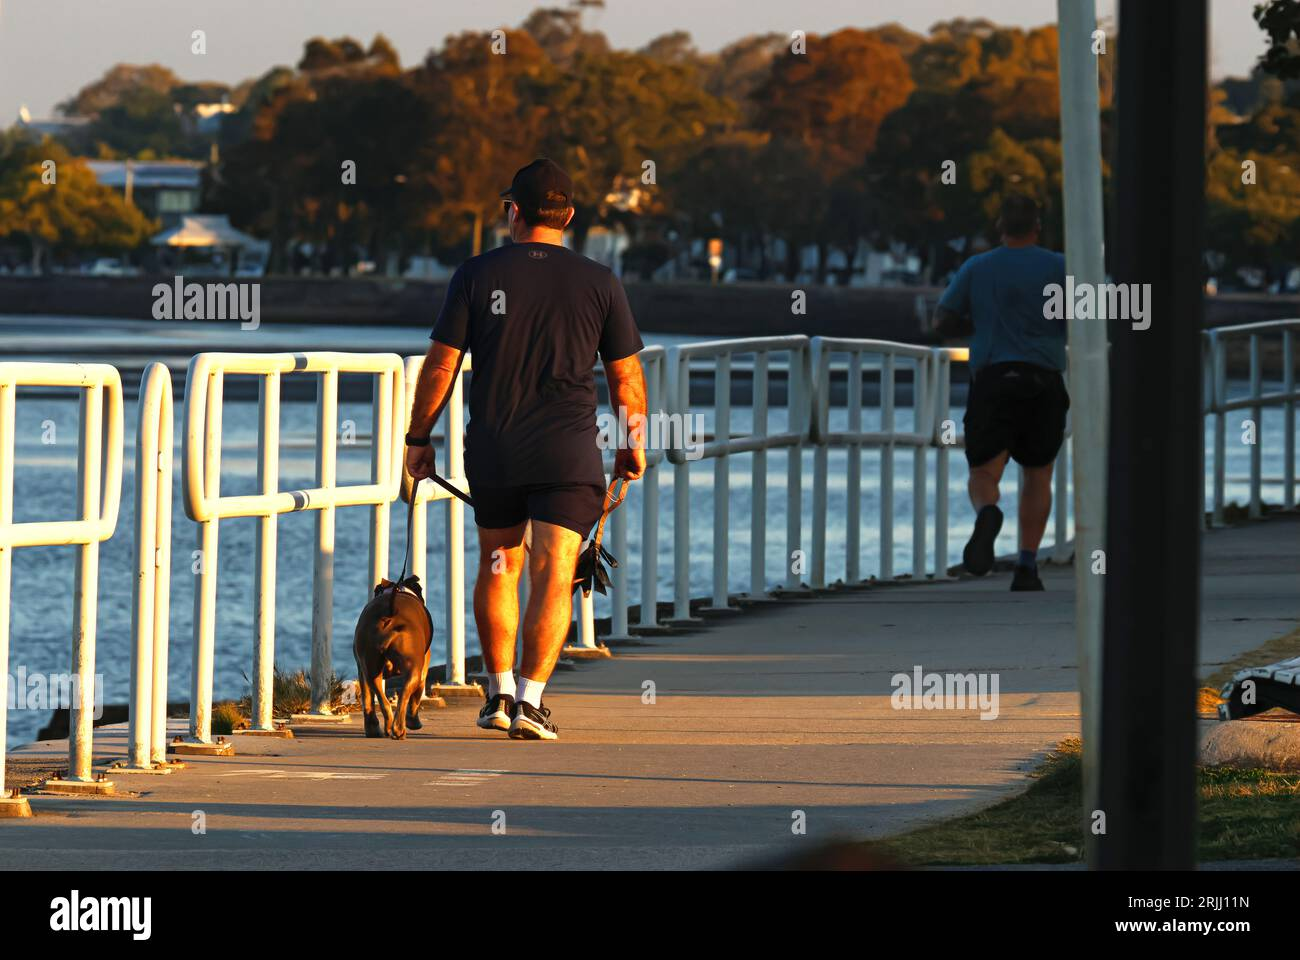

In [58]:
raw_image

In [59]:
question = "how many dogs are in the picture?"
inputs = processor(raw_image, question, return_tensors="pt")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

2


In [60]:
model = None
processor = None
gc.collect()

145

#### 7.4. Zero-Shot Image Classification

Consists of classifying an image without any training on the target classes.
- Pass the custom labels to the model.


In [ ]:
# Mas informacion de CLIPModel: https://huggingface.co/docs/transformers/en/model_doc/clip

from transformers import CLIPModel

model = CLIPModel.from_pretrained(
    pretrained_model_name_or_path="openai/clip-vit-large-patch14")

processor = AutoProcessor.from_pretrained(
    pretrained_model_name_or_path="openai/clip-vit-large-patch14")

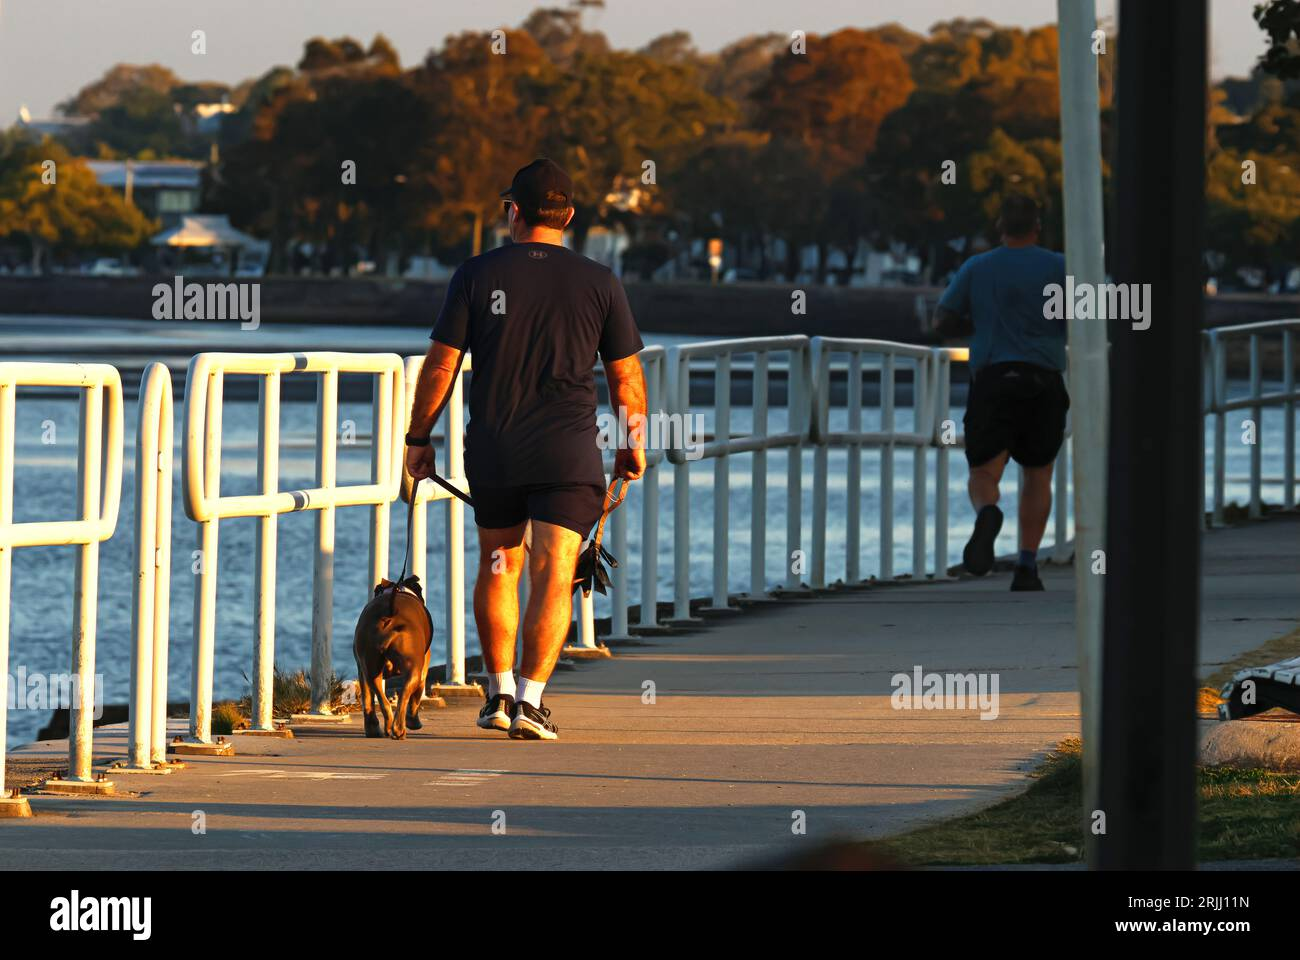

In [62]:
raw_image

In [63]:
labels = ["a photo of a cat", "a photo of a dog"]

inputs = processor(text=labels,
                   images=raw_image,
                   return_tensors="pt",
                   padding=True)

outputs = model(**inputs)
probs = outputs.logits_per_image.softmax(dim=1)[0]

In [64]:
probs = list(probs)
for i in range(len(labels)):
    print(f"label: {labels[i]} - probability of {probs[i].item():.4f}")

label: a photo of a cat - probability of 0.0054
label: a photo of a dog - probability of 0.9946


In [65]:
model = None
processor = None
gc.collect()

0